## AIML Reference-ANN and Tesnorflow

- <a href = #link_tensor>Tensorflow Basics</a> 
- <a href = #link_churn>Tensorflow Binary Classification 1: Bank Churn prediction </a>
- <a href = #link_churn2>Tensorflow Binary Classification 2: Fraud Detection </a>
  

## TF ANN Basics

loss function = 'binary_crossentropy' for binary classification. It should be 'categorical_crossentropy' for non binary classification

activation = 'sigmoid' for binary classification. activation = 'softmax' for non binary classification. 

output layer use 'sigmoid' for binary classification. use = 'softmax' for non binary classification.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
%matplotlib inline
import seaborn as sns


# <a id = "link_tensor"></a>Tensorflow Basics

In [3]:
a = 4 + 2j #complex number
b = 6 + 7j

c = a + b
d = tf.square(c)
print(a,b,c,d)



print(a-b)
print(a*b)

(4+2j) (6+7j) (10+9j) tf.Tensor((19+180j), shape=(), dtype=complex128)
(-2-5j)
(10+40j)


In [4]:
c = tf.constant([[1.4, 2.0, 2], [8, 2, 5]])
print(c)

tf.Tensor(
[[1.4 2.  2. ]
 [8.  2.  5. ]], shape=(2, 3), dtype=float32)


In [5]:
y = np.array([[1, 2, 2], [8, 2, 5]])
print(y)
# We can also convert a tensor into a numpy array by using .numpy()
c.numpy()

[[1 2 2]
 [8 2 5]]


array([[1.4, 2. , 2. ],
       [8. , 2. , 5. ]], dtype=float32)

In [6]:
print('Tensor Data Type', c.dtype)
print('Tensor Shape', c.shape)
# You can notice the similarity with numpy 
# You can also call the different default tensors as you would do for numpy

Tensor Data Type <dtype: 'float32'>
Tensor Shape (2, 3)


In [7]:
random_variable = tf.ones(shape=(3,3))
#random variable
tf_variable = tf.Variable(random_variable)
print(tf_variable)

#you can also update the values of your variable.
tf_variable.assign(tf.zeros(shape = (3,3)))
print(tf_variable)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


In [8]:
# computing derivative for the function 3x^2 at x = 3

x = tf.constant(3.0) #gradient at
with tf.GradientTape() as g:
  g.watch(x) #record the operations
  y = 3*x * x
dy_dx = g.gradient(y, x) 
print(dy_dx)


# you can also use nested GradientTape() for the second derivative
#computing second derivative for the function 4x^2 at x = 4.0

x = tf.constant(4.0)
with tf.GradientTape() as gt:
  gt.watch(x)
  with tf.GradientTape() as g:
    g.watch(x)  
    y = 4*x*x
  dy_dx = g.gradient(y, x)
d2y_dx2 = gt.gradient(dy_dx,x)
print(d2y_dx2)


tf.Tensor(18.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


#### 1. Create a constant tensor array 'x' like [2,3,4] and find element wise e^x

In [9]:
x = tf.constant([2.0,3.0,4.0])
x = tf.math.exp(x)
print(x)

tf.Tensor([ 7.389056 20.085537 54.59815 ], shape=(3,), dtype=float32)


#### 2. Declare a variable with a 3*2 shaped floating elements array with elements picked from a random normal distributions.   

In [10]:
x = tf.Variable(tf.random.normal(shape=(3,2)))
x

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 1.3800099 , -0.5124265 ],
       [ 0.8405381 , -0.21554951],
       [ 0.09070443,  1.7931073 ]], dtype=float32)>

#### 3. Subtract 1 from every element of the above matrix.

In [11]:
x.assign_sub(tf.ones(shape = (3,2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[ 0.3800099 , -1.5124265 ],
       [-0.15946192, -1.2155495 ],
       [-0.90929556,  0.7931073 ]], dtype=float32)>

#### 4. Calculate the third derivative of the function 4x^3 + x^2 + 1 at x = 1

In [12]:

x = tf.constant(1.0) 
with tf.GradientTape() as g:
  g.watch(x) 
  with tf.GradientTape() as g1:
    g1.watch(x) 
    with tf.GradientTape() as g2:
      g2.watch(x) 
      y = 4*x*x*x + x*x + 1
    dy_dx = g2.gradient(y, x)   
  d2y_dx2 = g1.gradient(dy_dx, x)
d3y_dx3 = g.gradient(d2y_dx2, x)

print(d3y_dx3)

tf.Tensor(24.0, shape=(), dtype=float32)


#### 5. Calculate dot product of matrices [[1,2,3],[4,5,6],[7,8,9]] and [[1],[2],[3]] using tensorflow functions. Also, find the element wise multiplication of the two.

In [13]:
a = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
b = tf.constant([[1],[2],[3]])

c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[14]
 [32]
 [50]], shape=(3, 1), dtype=int32)


In [14]:
d = tf.multiply(a, b)
d

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]], dtype=int32)>

# <a id = "link_churn"></a>Tensorflow Sequential Prediction: Celsius to Farenheit

In [15]:
Temperature_df = pd.read_csv('Celsius to Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [16]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [17]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Celsius', ylabel='Fahrenheit'>

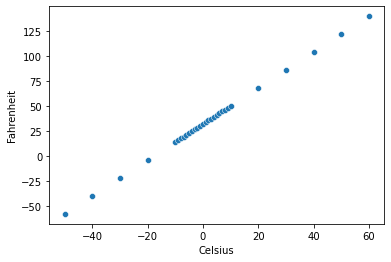

In [18]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

In [19]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [22]:
epochs_hist = model.fit(X_train, y_train, epochs = 300)

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 3710.0146
Epoch 2/300
1/1 [==============================] - 0s 763us/step - loss: 2634.1316
Epoch 3/300
1/1 [==============================] - 0s 720us/step - loss: 1822.6710
Epoch 4/300
1/1 [==============================] - 0s 753us/step - loss: 1271.9604
Epoch 5/300
1/1 [==============================] - 0s 864us/step - loss: 964.8922
Epoch 6/300
1/1 [==============================] - 0s 809us/step - loss: 864.6901
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 912.0265
Epoch 8/300
1/1 [==============================] - 0s 818us/step - loss: 1031.9385
Epoch 9/300
1/1 [==============================] - 0s 819us/step - loss: 1152.1809
Epoch 10/300
1/1 [==============================] - 0s 815us/step - loss: 1222.7386
Epoch 11/300
1/1 [==============================] - 0s 825us/step - loss: 1223.5792
Epoch 12/300
1/1 [==============================] - 0s 802us/step - loss: 1159.4796
Epoch 13

1/1 [==============================] - 0s 1ms/step - loss: 2.2717e-05
Epoch 199/300
1/1 [==============================] - 0s 1ms/step - loss: 1.8023e-05
Epoch 200/300
1/1 [==============================] - 0s 762us/step - loss: 1.4729e-05
Epoch 201/300
1/1 [==============================] - 0s 773us/step - loss: 1.2277e-05
Epoch 202/300
1/1 [==============================] - 0s 567us/step - loss: 1.0117e-05
Epoch 203/300
1/1 [==============================] - 0s 786us/step - loss: 7.9120e-06
Epoch 204/300
1/1 [==============================] - 0s 885us/step - loss: 5.7009e-06
Epoch 205/300
1/1 [==============================] - 0s 1ms/step - loss: 3.7962e-06
Epoch 206/300
1/1 [==============================] - 0s 1ms/step - loss: 2.4527e-06
Epoch 207/300
1/1 [==============================] - 0s 1ms/step - loss: 1.7175e-06
Epoch 208/300
1/1 [==============================] - 0s 752us/step - loss: 1.4058e-06
Epoch 209/300
1/1 [==============================] - 0s 896us/step - loss: 1.2

1/1 [==============================] - 0s 567us/step - loss: 2.5395e-09
Epoch 295/300
1/1 [==============================] - 0s 567us/step - loss: 2.5644e-09
Epoch 296/300
1/1 [==============================] - 0s 697us/step - loss: 2.4699e-09
Epoch 297/300
1/1 [==============================] - 0s 654us/step - loss: 2.4717e-09
Epoch 298/300
1/1 [==============================] - 0s 563us/step - loss: 2.1073e-09
Epoch 299/300
1/1 [==============================] - 0s 596us/step - loss: 1.8142e-09
Epoch 300/300
1/1 [==============================] - 0s 550us/step - loss: 1.5112e-09


In [23]:
epochs_hist.history.keys()

dict_keys(['loss'])

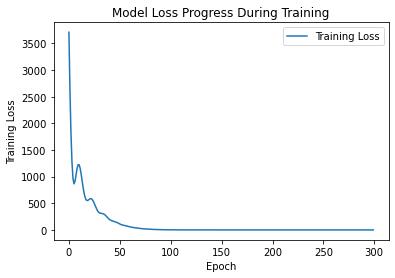

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [25]:
model.get_weights()

[array([[1.7999995]], dtype=float32), array([32.000034], dtype=float32)]

In [26]:
Temp_C = 21
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)

Temperature in degF Using Trained ANN = [[69.80002]]


In [27]:
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)

Temperature in degF Using Equation = 69.80000000000001


# Tensorflow Linear Regression on Car price

In [28]:
import pandas as pd
import numpy as np

cars_data = pd.read_csv('usedcars.csv')
cars_data

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [29]:
cars_data.isna().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

In [30]:
#just some basic preprocessing
cars_data.drop_duplicates()
#creating dummy variables for the categorical features
cars_data = pd.get_dummies(cars_data)
cars_data = cars_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
cars_data

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011.0,21992.0,7413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2011.0,20995.0,10926.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2011.0,19995.0,7351.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2011.0,17809.0,11613.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2012.0,17500.0,8367.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006.0,6200.0,95000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
146,2002.0,5995.0,87003.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
147,2000.0,5980.0,96841.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
148,2001.0,4899.0,151479.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
#explorinfg column names
cars_data.columns

Index(['year', 'price', 'mileage', 'model_SE', 'model_SEL', 'model_SES',
       'color_Black', 'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       'transmission_AUTO', 'transmission_MANUAL'],
      dtype='object')

In [32]:
#getting the features and labels and finally splitting the test and train data.


from sklearn.model_selection import train_test_split
X = cars_data[['year','mileage', 'model_SE', 'model_SEL', 'model_SES',
       'color_Black', 'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       'transmission_AUTO', 'transmission_MANUAL']]
Y = cars_data['price']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#let us scale the data as features are on different scales which might be a problem while modelling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.75      , 0.27928138, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.58332825, 0.5233474 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.75      , 0.21721278, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83332825, 0.20944397, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33332825, 0.6878496 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83332825, 0.2253431 , 1.        , ..., 0.        , 1.        ,
        0.        ]], dtype=float32)

In [33]:
import tensorflow as tf
print(tf.__version__)
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

2.2.0


In [34]:
X_train.shape[1]

16

In [35]:
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  return loss

In [36]:

for epoch in range(50):
  loss = train(X_train, y_train)
  print('Epoch %d: Loss = %.4f' % (epoch, float(loss)))


print('Final Weights after 50 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 50 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Loss = 176731056.0000
Epoch 1: Loss = 157933824.0000
Epoch 2: Loss = 141282512.0000
Epoch 3: Loss = 126532152.0000
Epoch 4: Loss = 113465592.0000
Epoch 5: Loss = 101890456.0000
Epoch 6: Loss = 91636384.0000
Epoch 7: Loss = 82552480.0000
Epoch 8: Loss = 74505040.0000
Epoch 9: Loss = 67375672.0000
Epoch 10: Loss = 61059548.0000
Epoch 11: Loss = 55463716.0000
Epoch 12: Loss = 50505956.0000
Epoch 13: Loss = 46113356.0000
Epoch 14: Loss = 42221368.0000
Epoch 15: Loss = 38772792.0000
Epoch 16: Loss = 35717000.0000
Epoch 17: Loss = 33009130.0000
Epoch 18: Loss = 30609448.0000
Epoch 19: Loss = 28482740.0000
Epoch 20: Loss = 26597850.0000
Epoch 21: Loss = 24927150.0000
Epoch 22: Loss = 23446196.0000
Epoch 23: Loss = 22133286.0000
Epoch 24: Loss = 20969276.0000
Epoch 25: Loss = 19937130.0000
Epoch 26: Loss = 19021806.0000
Epoch 27: Loss = 18209960.0000
Epoch 28: Loss = 17489792.0000
Epoch 29: Loss = 16850832.0000
Epoch 30: Loss = 16283805.0000
Epoch 31: Loss = 15780509.0000
Epoch 32: Lo

In [37]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(8548196.0, shape=(), dtype=float32)


# <a id = "link_churn"></a>Tensorflow Binary Classification 1: Bank Churn prediction

In [38]:
dataset_file = 'bank.csv'

In [39]:
df = pd.read_csv(dataset_file)

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can drop RowNumber, CustomerId and Surname as these fields should have no impact on the churn rate

In [41]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

### Univariate and Bivariate analysis

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [43]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
df['Geography'].value_counts()  

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Geography has 3 unique values. We can keep this as categorical variable

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [46]:
df['Exited'].value_counts()  

0    7963
1    2037
Name: Exited, dtype: int64

Close to 20% of the customers in the data set exited the bank

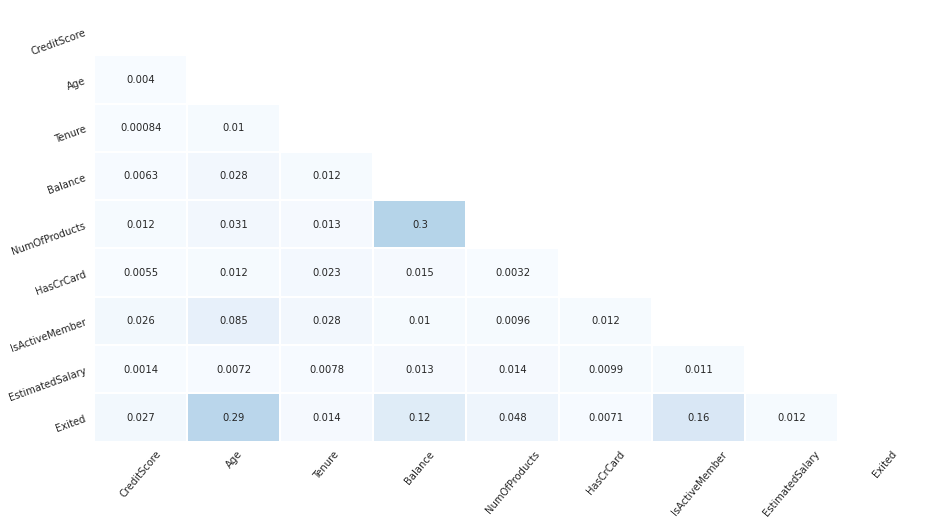

In [47]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)  
plt.yticks(rotation = 20)   
plt.show()

### All the variables has correlation with the Churn

In [48]:
df = pd.get_dummies(df, columns=['Geography'])
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [49]:
y_data = df['Exited']
df = df.drop('Exited', axis=1)

In [50]:
y_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


### Normalize the X data

In [52]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [53]:
df_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.870326e-16,1.00005,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.484679e-16,1.00005,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.400324e-16,1.00005,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-5.978551e-17,1.00005,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,-8.652634e-16,1.00005,-0.911583,-0.911583,-0.911583,0.807737,4.246377
HasCrCard,10000.0,-2.676082e-16,1.00005,-1.547768,-1.547768,0.646092,0.646092,0.646092
IsActiveMember,10000.0,2.164047e-16,1.00005,-1.030670,-1.030670,0.970243,0.970243,0.970243
EstimatedSalary,10000.0,-1.580958e-17,1.00005,-1.740268,-0.853594,0.001803,0.857243,1.737200
Geography_France,10000.0,7.723266e-16,1.00005,-1.002804,-1.002804,0.997204,0.997204,0.997204
Geography_Germany,10000.0,5.961232e-16,1.00005,-0.578736,-0.578736,-0.578736,1.727904,1.727904


In [54]:
y_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [55]:
X_data = df_scaled.iloc[:, :]

In [56]:
X_data.shape

(10000, 13)

In [57]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [58]:
y_data.shape

(10000,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [61]:
model = Sequential()


In [62]:
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
#model.add(Dense(64, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [63]:
sgd = optimizers.Adam(lr = 0.001)

In [64]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [66]:
model.fit(X_train, y_train.values, batch_size = 700, epochs = 100, verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6420
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7956
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7966
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7981
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8015
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8061
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8085
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8141
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8170
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8189
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8727
Epoch 84/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8737
Epoch 85/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8736
Epoch 86/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8737
Epoch 87/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8727
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8727
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8744
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8734
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8731
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8750
Epoch 93/100


In [67]:
results = model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 863us/step - loss: 0.3473 - accuracy: 0.8530


In [68]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.34734421968460083, 0.8529999852180481]


### Confusion Matrix

In [69]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 860us/step - loss: 0.3473 - accuracy: 0.8530
Accuracy Model1 (Dropout): 0.8529999852180481
Recall_score: 0.48661800486618007
Precision_score: 0.7067137809187279
F-score: 0.5763688760806917


array([[1506,   83],
       [ 211,  200]])

In [70]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Exited", "Not Exited"] , yticklabels = ["Exited", "Not Exited"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


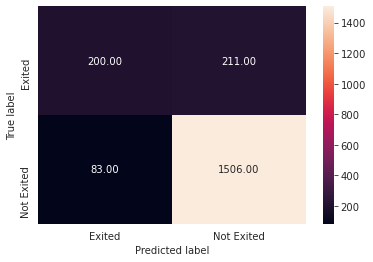

In [71]:
draw_cm( y_test, Y_pred_cls )

### Conclusion

1.   We got an accuracy of 85% with the AI model
2.   The accuracy is reasonable since we have all 10,000 data records. This is not sifficient for an AI model to have better accuracy



# <a id = "link_churn2"></a>Tensorflow Binary Classification 2: Fraud Detection

In [72]:
dataset_file = 'creditcard.csv'

In [73]:
data = pd.read_csv(dataset_file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
data = data.drop("Time", axis = 1)

In [75]:
X_data = data.iloc[:, :-1]

In [76]:
X_data.shape

(284807, 29)

In [77]:
y_data = data.iloc[:, -1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [79]:
X_train = preprocessing.normalize(X_train)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


In [81]:
model = Sequential()
model.add(Dense(64, input_shape = (29,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [82]:
sgd = optimizers.Adam(lr = 0.001)

In [83]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train, y_train.values, batch_size = 700, epochs = 10, verbose = 1)

Epoch 1/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9907
Epoch 2/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9988
Epoch 3/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9989
Epoch 4/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 5/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 6/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 7/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 8/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 9/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 10/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9992

In [86]:
X_test = preprocessing.normalize(X_test)

In [87]:
results = model.evaluate(X_test, y_test.values)

1781/1781 [==============================] - 2s 846us/step - loss: 0.0038 - accuracy: 0.9992


In [88]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.0037710785400122404, 0.9992451071739197]


In [89]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

1781/1781 [==============================] - 2s 850us/step - loss: 0.0038 - accuracy: 0.9992
Accuracy Model1 (Dropout): 0.9992451071739197
Recall_score: 0.71
Precision_score: 0.8352941176470589
F-score: 0.7675675675675675


array([[56848,    14],
       [   29,    71]])

# Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
def create_model(learn_rate=0.001, activation1='relu', activation2='tanh'):
    model = Sequential()
    model.add(Dense(64, input_shape=(29,), activation=activation1))
    model.add(Dense(32, activation=activation2))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = optimizers.Adam(lr=learn_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_grid = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# param_grid = {
#    'learn_rate': [0.001, 0.01, 0.1],
#     'activation1': ['relu', 'sigmoid'],
#     'activation2': ['tanh', 'sigmoid'],
#     'epochs': [5, 10, 15],
#     'batch_size': [200, 400, 700]
# }

In [ ]:
param_grid = {
   'learn_rate': [0.001],
    'activation1': ['relu'],
    'activation2': ['tanh',
    'epochs': [1,],
    'batch_size': [10, 20]
}

In [ ]:
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=1), verbose=1)

In [ ]:
grid_result = grid.fit(X_train, y_train.values)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))